# Least Mean Absolute Deviations regression
In this exercise, we will see how using least mean absolute deviations regression (also known as "quantile regression") can be superior to least squares regression when there are outliers.  When statisticians talk about models which will not be totally thrown off by a few outliers, they usually call these models "robust."
### Note: Let's not do `%matplotlib inline` for this one (I wasn't able to plot the line over the data with this option)

# First, let's make a contrived dataset
## Make our x's and our y's
Declare a variable `xs` and define it to be a list equal to `[0,1,2,...,9]` (hey! don't hard code that!).  Then declare `ys` and define to be a list that corresponds to the linear function, $$y = 2x$$  Defining `ys` is easy with a list comprehension.

In [65]:
xs = range(10)
ys = [2*x for x in xs]
print xs
print ys

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## Now, let's add our outlier
Let's add the number 10 to our `xs` and the corresponding y value that we will add to our `ys`, will be given by $$y = 3x$$ This will clearly be an outlier, since all of the other points fit perfectly on the line defined by $$y = 2x$$

In [66]:
xs.append(10)
ys.append(30)

print xs
print ys

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 30]


### Plot the data, to make sure our outlier is very "outliery"

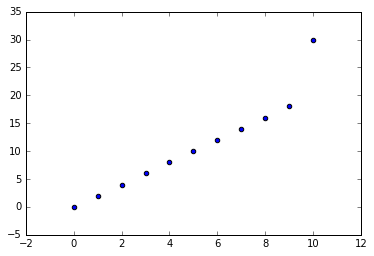

In [67]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x=xs,y=ys)

## Now, let's make a pandas DataFrame with our data
Entitle the columns "x" and "y", and add a third column, entitled "one", which will just contain the number 1 (used for the intercept later).

In [68]:
import pandas as pd
df = pd.DataFrame(columns = ['x', 'y','one'])
df['x'] = xs
df['y'] = ys
df['one'] = 1

#one = [1 for x in xs]
#xys = zip(xs,ys,ones)

# Now let's make regression lines using ordinary least squares (ols) and quantile regression (quantreg)
## First, ordinary least squares
Specify the model, fit the model, save the fit's predictions, and print the summary statistics.

In [92]:
import statsmodels.formula.api as smf

model = smf.ols(formula='y ~ x', data=df).fit()
#fit = model.fit()
predictions = model.predict(df[['x','one']])
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     87.48
Date:                Thu, 23 Jun 2016   Prob (F-statistic):           6.23e-06
Time:                        10:19:16   Log-Likelihood:                -25.642
No. Observations:                  11   AIC:                             55.28
Df Residuals:                       9   BIC:                             56.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3636      1.553     -0.878      0.403        -4.876     2.149
x              2.4545      0.262      9.353      0.000         1.861     3.048
==============================================================================
Omnibus:                       13.640   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.488
Skew:                           1.643   Prob(JB):                       0.0237
Kurtosis:                       5.353   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the line alongside the original data

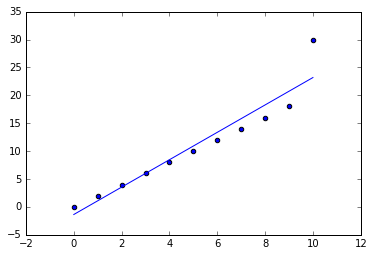

In [93]:
plt.scatter(xs,ys)
plt.plot(predictions)

## Now, quantile regression (quantreg), a.k.a. least absolute deviations
Specify the model, fit the model, save the fit's predictions, and print the summary statistics.

In [94]:

modelAbs = smf.quantreg(formula='y ~ x', data=df).fit()
#fit = model.fit()
predictions = modelAbs.predict(df[['x','one']])
modelAbs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.8571
Model:                       QuantReg   Bandwidth:                   8.876e-07
Method:                 Least Squares   Sparsity:                    1.419e-06
Date:                Thu, 23 Jun 2016   No. Observations:                   11
Time:                        10:32:58   Df Residuals:                        9
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.281e-07      4e-07     -0.570      0.583     -1.13e-06  6.77e-07
x              2.0000   6.76e-08   2.96e+07      0.000         2.000     2.000
==============================================================================
"""

### Plot the line alongside the original data

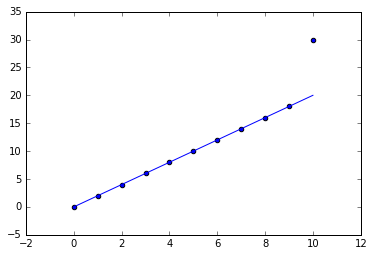

In [95]:
plt.scatter(xs,ys)
plt.plot(predictions)

## Much better, no?